# 决策树

和支持向量机一样，决策树是一种多功能机器学习算法，即可以执行分类任务也可以执行回归任务，甚至包括多输出（multioutput）任务。

决策树也是随机森林的基本组成部分，而随机森林是当今最强大的机器学习算法之一。

## 决策树的训练

在鸢尾花数据集上进行一个决策树分类器的训练。

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:]  # petal length and width y = iris.target 
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 决策树的可视化

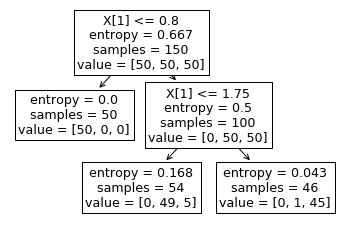

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
plot_tree(tree_clf)
plt.show()

* 节点的 `samples` 属性统计出它应用于多少个训练样本实例。
* 节点的 `value` 属性告诉你这个节点对于每一个类别的样例有多少个。
* 节点的 `gini/entropy` 属性用于测量它的纯度：如果一个节点包含的所有训练样例全都是同一类别的，我们就说这个节点是纯的（`Gini=0`）。

## 估计分类概率

决策树还可以估计某个实例属于特定类  k  的概率：首先遍历树来查找此实例的叶节点，然后它返回此节点中类  k  的训练实例的比例。

例如，假设你发现了一个花瓣长 5 厘米，宽 1.5 厘米的花朵。相应的叶节点是深度为 2 的左节点，因此决策树应该输出以下概率：Iris-Setosa 为 0%（0/54），Iris-Versicolor 为 90.7%（49/54），Iris-Virginica 为 9.3%（5/54）。当然，如果你要求它预测具体的类，它应该输出 Iris-Versicolor（类别 1），因为它具有最高的概率。我们了测试一下：

```python
tree_clf.predict_proba([[5, 1.5]])
# array([[0., 0.90740741, 0.09259259]])

tree_clf.predict([[5, 1.5]])
# array([1])
```

# CART 训练算法

Scikit-Learn 用分裂回归树（Classification And Regression Tree，简称 CART）算法训练决策树（也叫“增长树”）。

首先使用单个特征 `k` 和阈值 $t_k$（例如，“花瓣长度 ≤2.45cm”）将训练集分成两个子集。它如何选择 `k` 和 $t_k$ 呢？它寻找到能够产生最纯粹的子集一对 $(k, t_k)$ ，然后通过子集大小加权计算。

当它成功的将训练集分成两部分之后，它将会继续使用相同的递归式逻辑继续的分割子集，然后是子集的子集。当达到预定的最大深度之后将会停止分裂（由 `max_depth` 超参数决定），或者是它找不到可以继续降低不纯度的分裂方法的时候。几个其他超参数控制了其他的停止生长条件（`min_samples_split`，`min_samples_leaf`，`min_weight_fraction_leaf`，`max_leaf_nodes`）。

# 计算复杂度

在建立好决策树模型后，做出预测需要遍历决策树，从根节点一直到叶节点。决策树通常近似左右平衡，因此遍历决策树需要经历大致 $O(log_2m)$ 个节点。由于每个节点只需要检查一个特征的值，因此总体预测复杂度仅为 $O(log_2m)$ ，与特征的数量无关。所以即使在处理大型训练集时，预测速度也非常快。

然而，训练算法的时候（训练和预测不同）需要比较所有特征（如果设置了 `max_features` 会更少一些）

在每个节点的所有样本上。就有了 $O(nmlog(m))$ 的训练复杂度。对于小型训练集（少于几千例），Scikit-Learn 可以通过预先设置数据（`presort = True`）来加速训练，但是这对于较大训练集来说会显着减慢训练速度。

# 基尼不纯度或是信息熵

通常，算法使用 Gini 不纯度来进行检测， 但是你也可以通过将标准超参数设置为 `entropy` 来使用熵不纯度进行检测。这里熵的概念是源于热力学中分子混乱程度的概念，当分子井然有序的时候，熵值接近于 0。

__在机器学习中，熵经常被用作不纯度的衡量方式，当一个集合内只包含一类实例时， 我们称为数据集的熵为 0__。

那么我们到底应该使用 Gini 指数还是熵呢？ 事实上大部分情况都没有多大的差别：他们会生成类似的决策树。

基尼指数计算稍微快一点，所以这是一个很好的默认值。但是，也有的时候它们会产生不同的树，基尼指数会趋于在树的分支中将最多的类隔离出来，而熵指数趋向于产生略微平衡一些的决策树模型。

# 正则化超参数

* `min_samples_split`: 节点在被分裂之前必须具有的最小样本数;
* `min_samples_leaf`: 叶节点必须具有的最小样本数;
* `min_weight_fraction_leaf`: 和 `min_samples_leaf` 相同，但表示为加权总数的一小部分实例;
* `max_leaf_nodes`: 叶节点的最大数量;
* `max_features`: 在每个节点被评估是否分裂的时候，具有的最大特征数量.

增加 `min_*` hyperparameters 或者减少 `max_*` hyperparameters 会使模型正则化。

# 回归

决策树也能够执行回归任务，使用 Scikit-Learn 的 `DecisionTreeRegressor` 类可以构建一个回归树。

# 不稳定性

决策树到底有哪些特点：

* 它很容易理解和解释，易于使用且功能丰富而强大。
